In [1]:
import numpy as np
import random
import time

import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import cm

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

random.seed(30)
np.random.seed(seed=30)

print('check random: ', random.randint(0,100))
print('check numpy random: ', np.random.randint(0,100))


check random:  69
check numpy random:  37


In [2]:
#Some variables to calculate the velocity
W = 0.5
c1 = 0.015
c2 = 0.5

# variables tha control optimizer
iterations = 50
target_error = 1e-7

# create population
n_dim = 2
# n_particles = 50
max_part = 10000
part_jump = 2500

range_particles = np.arange(0, max_part+1, part_jump)
range_particles = np.delete(range_particles, 0)
# range_particles = np.insert(range_particles, 0, 10)
range_particles


array([ 2500,  5000,  7500, 10000])

In [3]:
#function that models the problem
target = 1
def fitness_function(position):
    return position[0]**2 + position[1]**2 + 1


# #function that models the problem
# target = 0
# def fitness_function(position):
#     A = 10
#     f = 0
#     for j in range(2):
#         f = f + position[j]**2 - A*np.cos(2*np.pi*position[j])
#     return A*2 + f

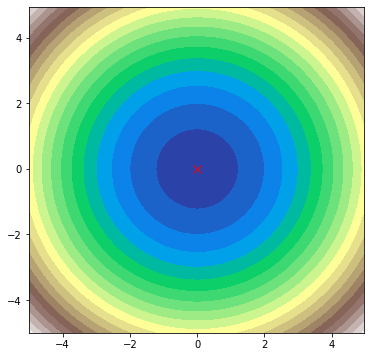

fitness: 1


In [4]:
delta = .05
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = fitness_function([X,Y])

fig, ax = plt.subplots(figsize=(6,6))
cmap = cm.get_cmap(name='terrain', lut=None)
# cmap = cm.get_cmap(name='viridis', lut=None)

CS = ax.contourf(X, Y, Z1, 19, cmap=cmap)

plt.plot(0,0, 'rx', markersize=8)

plt.show()

print('fitness:',fitness_function([0,0]))

In [5]:
def pso(particle_position_vector, W, c1, c2, target, n_iterations, target_error, n_particles, n_dim):
    
#     random.seed(30)
#     np.random.seed(seed=30)
    
#     # create initial particles
#     t1 = time.time()
#     particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*5, (-1)**(bool(random.getrandbits(1))) * random.random()*5]) for _ in range(n_particles)])
#     particle_position_vector
#     pbest_position = particle_position_vector
#     pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
#     gbest_fitness_value = float('inf')
#     gbest_position = np.array([float('inf'), float('inf')])
    
#     velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
    pbest_position = particle_position_vector
    pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
    gbest_fitness_value = float('inf')
    gbest_position = np.array([float('inf'), float('inf')])

    velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
    
#     t2 = time.time()
    
    list_gbest_pos = []
    list_gbest_val = []
    list_fit_cand = []
    
    
        
    iteration = 0

    position_history = dict([(key, []) for key in range(n_particles)])
    fitness_history = dict([(key, []) for key in range(n_particles)])

    t3 = time.time()
    
    while iteration < n_iterations:
        for i in range(n_particles):
            fitness_cadidate = fitness_function(particle_position_vector[i])
            
            fitness_history[i].append(fitness_cadidate)
            
            
            list_fit_cand.append(fitness_cadidate)

            if(pbest_fitness_value[i] > fitness_cadidate):
                pbest_fitness_value[i] = fitness_cadidate
                pbest_position[i] = particle_position_vector[i]

            if(gbest_fitness_value > fitness_cadidate):
                gbest_fitness_value = fitness_cadidate
                gbest_position = particle_position_vector[i]

                best_particle = i

        list_gbest_pos.append(gbest_position)
        list_gbest_val.append(gbest_fitness_value)

#         if(abs(gbest_fitness_value - target) < target_error):
#             break

        for i in range(n_particles):

            new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
            new_position = new_velocity + particle_position_vector[i]
            particle_position_vector[i] = new_position

            position_history[i].append(new_position)


        iteration = iteration + 1

    t4 = time.time()
    
    print("The best position is ", gbest_position, "in iteration number ", iteration, " with particle ", best_particle)
    
    
    sol_error = abs(gbest_fitness_value - target)
    
    init_time = t2 - t1
    opt_time  = t4 - t3
    
    max_iteration = iteration
    
    run_metrics = [n_iterations, n_particles, sol_error, max_iteration, init_time, opt_time]
    
    
    return position_history, fitness_history, run_metrics


In [6]:
comparative_metrics_def = []
comparative_convergence_def = []

for n_part in range_particles:
    
    random.seed(30)
    np.random.seed(seed=30)

    # create initial particles
    t1 = time.time()
    particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*5, (-1)**(bool(random.getrandbits(1))) * random.random()*5]) for _ in range(n_part)])
    particle_position_vector

    t2 = time.time()

    list_gbest_pos = []
    list_gbest_val = []
    list_fit_cand = []


    position_history, fitness_history, run_metrics = pso(particle_position_vector, 
                                                         W, c1, c2, target, iterations, target_error, n_part, n_dim)
    
    comparative_metrics_def.append(run_metrics)
    

The best position is  [3.41849603e-09 9.33880256e-09] in iteration number  50  with particle  804
The best position is  [-9.74370652e-09  2.60084503e-09] in iteration number  50  with particle  2902
The best position is  [ 7.36142489e-09 -4.58387391e-09] in iteration number  50  with particle  1427
The best position is  [-4.99169769e-09 -8.86354847e-09] in iteration number  50  with particle  4189


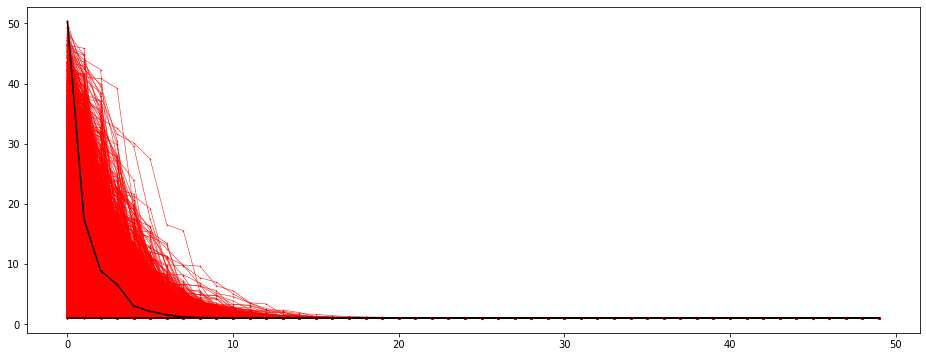

In [7]:
fig, ax = plt.subplots(figsize=(16,6))

for data_dict in fitness_history.values():

        a = np.array(data_dict)

        x1 = a[:]

        dots1, = ax.plot(x1, 'r-o', lw=0.5, markersize=0.5)

        
ax.plot(max(list(fitness_history.values())), 'k-o', lw=1.5, markersize=0.5)
ax.plot(min(list(fitness_history.values())), 'k-o', lw=1.5, markersize=0.5)

plt.show()


In [8]:

#function that models the problem
target = 1
# @vectorize(['float32(float32, float32)'], target='parallel')
# @vectorize(['float32(float32, float32)'], target='cuda')
# @jit
def fitness_function_vec(a,b):
    return a**2 + b**2 + 1



In [9]:

def pso_vec(particle_position_vectora, particle_position_vectorb, 
            particle_velocity_vectora, particle_velocity_vectorb,
            pbest_fitness_value1, gbest_fitness_value1,
            W, c1, c2, target, n_iterations, target_error, n_particles, n_dim):
    
        
    iteration = 0

#     position_history = dict([(key, []) for key in range(n_particles)])
#     fitness_history = dict([(key, []) for key in range(n_particles)])

    t3 = time.time()
    
    run_convergence = []
    
    
    # start optimization procedure
    while iteration < n_iterations:
        
        
        fitness_cadidate1 = fitness_function_vec(np.ascontiguousarray(particle_position_vectora, dtype=np.float32), np.ascontiguousarray(particle_position_vectorb, dtype=np.float32))
#         fitness_cadidate1 = fitness_function_vec(particle_position_vectora, particle_position_vectorb)
#         print('fitness_cadidate1', fitness_cadidate1)

        adjusted_fitness_ind = fitness_cadidate1 < pbest_fitness_value1
#         print(adjusted_fitness_ind)
        original_value_ind = fitness_cadidate1 >= pbest_fitness_value1
#         print(original_value_ind)
        pbest_fitness_value1 = original_value_ind*pbest_fitness_value1 + adjusted_fitness_ind*fitness_cadidate1
#         print('new pbest', pbest_fitness_value1)
        
        # adjust only the improved positions
        particle_pbest_pos_vectora = original_value_ind*particle_position_vectora + adjusted_fitness_ind*particle_position_vectora
        particle_pbest_pos_vectorb = original_value_ind*particle_position_vectorb + adjusted_fitness_ind*particle_position_vectorb
#         print('\n\nparticle_position_vectora\n', particle_pbest_pos_vectora)
#         print('\nparticle_position_vectorb\n', particle_pbest_pos_vectorb)
        
        # check if has new global best
        gadjusted_fitness_ind = fitness_cadidate1 <= gbest_fitness_value1
#         print('gadjusted_fitness_ind', gadjusted_fitness_ind)
        majorar_gadjusted_fitness_ind = fitness_cadidate1 > gbest_fitness_value1
#         print('gadjusted_fitness_ind', gadjusted_fitness_ind)
        
        # if has take value and position
        if gadjusted_fitness_ind.any() == True:
            
            # adjust values bigger than old solution to a really big number (in order to discard on minimization)
            minimum_candidates = majorar_gadjusted_fitness_ind*fitness_cadidate1*1e12 + gadjusted_fitness_ind*fitness_cadidate1
#             print('minimum_candidates', minimum_candidates)
            minimum_from_candidates = np.min(minimum_candidates)
#             print('minimum_from_candidates', minimum_from_candidates)
            
            # set the new minimum
            gbest_fitness_value1 = minimum_from_candidates
            
            # take the index of best solution to find the position (ASSUMED TO USE THE FIRST VALUE)
            gbest_fitness_value_ind = np.where(fitness_cadidate1 == minimum_from_candidates)[0][0]
#             print('111 gbest_fitness_value1_ind', gbest_fitness_value_ind)
    
            # set the new best position
            particle_gbest_pos_vectora = particle_pbest_pos_vectora[gbest_fitness_value_ind]
            particle_gbest_pos_vectorb = particle_pbest_pos_vectorb[gbest_fitness_value_ind]
        
        
        if(abs(gbest_fitness_value1 - target) < target_error):
            break

        # update position and velocity
        new_particle_velocity_vectora = (W*particle_velocity_vectora) + (c1*random.random()) * (particle_pbest_pos_vectora - particle_position_vectora) + (c2*random.random()) * (particle_gbest_pos_vectora - particle_position_vectora)
        new_particle_velocity_vectorb = (W*particle_velocity_vectorb) + (c1*random.random()) * (particle_pbest_pos_vectorb - particle_position_vectorb) + (c2*random.random()) * (particle_gbest_pos_vectorb - particle_position_vectorb)

#         new_particle_position_vectora = particle_position_vectora + new_particle_velocity_vectora
#         new_particle_position_vectorb = particle_position_vectorb + new_particle_velocity_vectorb
#         particle_position_vectora = new_particle_position_vectora
#         particle_position_vectorb = new_particle_position_vectorb

        particle_position_vectora += new_particle_velocity_vectora
        particle_position_vectorb += new_particle_velocity_vectora

        run_convergence.append([iteration, gbest_fitness_value1])
    
        # move to next iteration
        iteration = iteration + 1

    t4 = time.time()
      
    
    sol_error = abs(gbest_fitness_value1 - target)
    
    opt_time  = t4 - t3
    
    print("\nThe best position is ", particle_gbest_pos_vectora, particle_gbest_pos_vectorb, "in iteration number ", iteration, " with value ", gbest_fitness_value1, " and error ", sol_error)
    
    max_iteration = iteration
    
    run_metrics = [n_iterations, n_particles, sol_error, max_iteration, opt_time]
    
    
#     return position_history, fitness_history, run_metrics
    return particle_position_vectora, particle_position_vectorb, run_metrics, run_convergence


In [10]:

comparative_metrics_vec = []
comparative_convergence_vec = []

for n_part in range_particles:
    
    
    random.seed(30)
    np.random.seed(seed=30)

    # create initial particles
    t1 = time.time()
    particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*5, (-1)**(bool(random.getrandbits(1))) * random.random()*5]) for _ in range(n_part)], dtype=np.float32)
    #     particle_position_vector
    pbest_position = particle_position_vector
    #     pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)], dtype=np.float32)
    #     pbest_fitness_value = np.array([999999. for _ in range(n_particles)], dtype=np.float32)
    pbest_fitness_value1 = np.array([999999. for _ in range(n_part)], dtype=np.float32)
    #     gbest_fitness_value = float('inf')
    # gbest_fitness_value = 999999.
    gbest_fitness_value1 = 999999.
    #     gbest_position = np.array([float('inf'), float('inf')])
    gbest_position = np.array([999999., 999999.])

    velocity_vector = np.array([np.array([0., 0.], dtype=np.float32) for _ in range(n_part)], dtype=np.float32)
    t2 = time.time()

    # list_gbest_pos = []
#     list_gbest_val = []
    
    # list_fit_cand = []

    particle_position_vectora = particle_position_vector[:,0]
    particle_position_vectorb = particle_position_vector[:,1]


    particle_velocity_vectora = velocity_vector[:,0]
    particle_velocity_vectorb = velocity_vector[:,1]
    

    (position_a_def,
     position_b_def,
     run_metrics_def,
     convergence_def) = pso_vec(particle_position_vectora, particle_position_vectorb, 
                                    particle_velocity_vectora, particle_velocity_vectorb,
                                    pbest_fitness_value1, gbest_fitness_value1, 
                                    W, c1, c2, target, iterations, target_error, n_part, n_dim)
    
    comparative_metrics_vec.append(run_metrics_def)
    comparative_convergence_def.append(convergence_def)



The best position is  0.0016961772 0.0029819706 in iteration number  50  with value  1.0000118  and error  1.1801719665527344e-05

The best position is  0.00043205507 0.0017178466 in iteration number  50  with value  1.0000031  and error  3.0994415283203125e-06

The best position is  0.00021218897 0.0014979804 in iteration number  50  with value  1.0000023  and error  2.2649765014648438e-06

The best position is  -0.00076242036 -0.00023646896 in iteration number  50  with value  1.0000006  and error  5.960464477539062e-07


In [11]:
comparative_metrics_def, comparative_metrics_vec

([[50, 2500, 0.0, 50, 0.004987239837646484, 0.8871126174926758],
  [50, 5000, 0.0, 50, 0.009973526000976562, 1.781738519668579],
  [50, 7500, 0.0, 50, 0.013962745666503906, 2.693953514099121],
  [50, 10000, 0.0, 50, 0.018949508666992188, 3.574244499206543]],
 [[50, 2500, 1.1801719665527344e-05, 50, 0.005983591079711914],
  [50, 5000, 3.0994415283203125e-06, 50, 0.00698089599609375],
  [50, 7500, 2.2649765014648438e-06, 50, 0.008977174758911133],
  [50, 10000, 5.960464477539062e-07, 50, 0.011967897415161133]])

[]

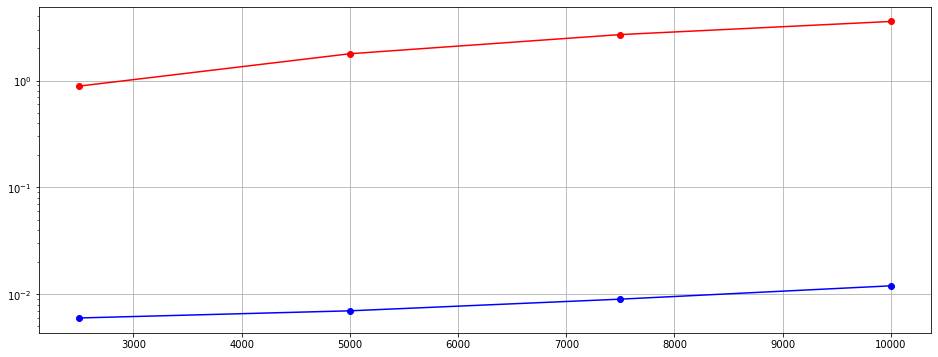

In [12]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(np.array(comparative_metrics_vec)[:,1], np.array(comparative_metrics_vec)[:,4], 'b-o')
ax.plot(np.array(comparative_metrics_def)[:,1], np.array(comparative_metrics_def)[:,5], 'r-o')

scale = 'linear'
scale = 'log'

# ax.set_xscale(scale)
ax.set_yscale(scale)
plt.grid(True)
plt.plot()

In [13]:
speedup = np.array(comparative_metrics_def)[:,5]/np.array(comparative_metrics_vec)[:,4]
speedup

array([148.25756066, 255.23063525, 300.08923592, 298.65266849])

[]

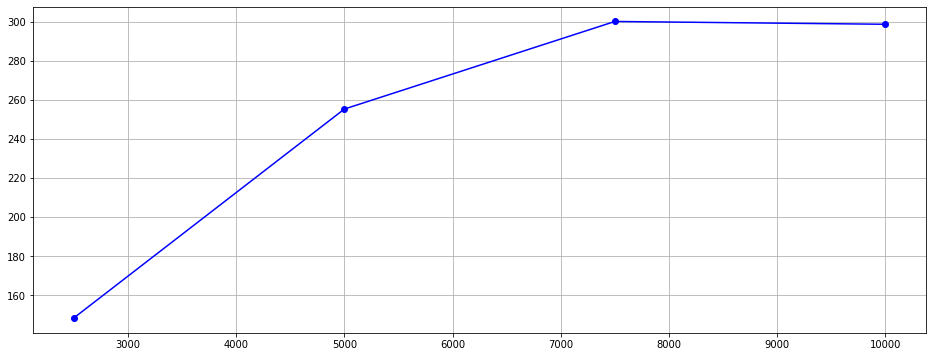

In [14]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(np.array(comparative_metrics_vec)[:,1], np.array(speedup), 'b-o')

scale = 'linear'
scale = 'log'

# ax.set_xscale(scale)
# ax.set_yscale(scale)
plt.grid(True)
plt.plot()